### 📊 Exploring the Relationship Between Population Size and GDP per Capita


In a world marked by significant economic disparities, it is often assumed that a larger population negatively impacts a country's GDP per capita. But is this assumption always true?

In this analysis, we explore the relationship between **population size** and **GDP per capita** across a set of countries in a specific year. Our goal is to answer the following question:

> **Is there a clear relationship between a country's population size and the level of income per person?**

To investigate this, we will calculate the GDP per capita for each country and use both statistical and visual tools to uncover potential patterns or trends. This will help us better understand how these two key economic indicators might be connected.



#### **Dataset 1**

**Type:** Data retrieved programmatically via API (Economic data from World Bank API)

**Method:** The data was gathered programmatically by accessing the *World Bank API* using the `pandas-datareader` library's `wb.download()` function.

**Dataset variables:**

* `country`: Name of the country
* `year`: Year
* `GDP`: Gross Domestic Product in current US dollars (market value)

**Why I picked this dataset:**
I chose the World Bank GDP dataset because it provides reliable, up-to-date, and internationally recognized economic indicators. Since my goal is to understand how a country's population size may influence its economic performance, having accurate data on Gross Domestic Product is crucial. The World Bank API allows for programmatic access to historical GDP values across multiple countries and years, enabling flexible analysis and comparisons. This makes it an ideal source for exploring economic patterns in a structured and scalable way.

In [5]:
!pip install pandas-datareader

In [6]:
import pandas_datareader.wb as wb
import pandas as pd

indicators = {"NY.GDP.MKTP.CD": "GDP"}

gdp_data = wb.download(indicator=list(indicators.keys()), country='all', start=2010, end=2015)

gdp_data.rename(columns=indicators, inplace=True)

print(gdp_data.head())

                                           GDP
country                     year              
Africa Eastern and Southern 2015  8.983089e+11
                            2014  9.787438e+11
                            2013  9.624413e+11
                            2012  9.529985e+11
                            2011  9.454390e+11


/tmp/ipython-input-6-2586019635.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp_data = wb.download(indicator=list(indicators.keys()), country='all', start=2010, end=2015)



#### Dataset 2

**Type:** CSV File (Population data from World Population dataset)

**Method:** The data was gathered using the *manual download* method from the World Population Dataset source.

**Dataset variables:**

* `Rank`: Global population rank of the country
* `CCA3`: ISO 3166-1 alpha-3 country code
* `Country/Territory`: Name of the country or territory
* `Capital`: Capital city of the country
* `Continent`: Continent where the country is located
* `2022 Population`: Population in the year 2022
* `2020 Population`: Population in the year 2020
* `2015 Population`: Population in the year 2015
* `2010 Population`: Population in the year 2010
* `2000 Population`: Population in the year 2000
* `1990 Population`: Population in the year 1990
* `1980 Population`: Population in the year 1980
* `1970 Population`: Population in the year 1970
* `Area (km²)`: Total land area of the country in square kilometers
* `Density (per km²)`: Population density (people per square kilometer)
* `Growth Rate`: Annual population growth rate
* `World Population Percentage`: Percentage of the world’s total population represented by this country


**Why I picked this dataset:**
This population dataset was selected because it offers comprehensive demographic information for a wide range of countries and time periods. It includes historical population data from 1970 to 2022, as well as details like land area, growth rate, and population density. These attributes are essential for analyzing how population changes may relate to economic output. By integrating this with GDP data, we can calculate GDP per capita and investigate whether population size correlates with individual prosperity in different countries.

In [7]:
population_df = pd.read_csv("world_population.csv")

population_df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00




### Population Data Preparation

To prepare the population dataset for analysis and merging:

1. **Renamed the Country Column**
   The column `'Country/Territory'` was renamed to `'country'` to standardize column naming and simplify future merging operations.



2. **Reshaped the Dataset to Long Format**
   The population data was originally in a wide format, with separate columns for each year (e.g., `'2010 Population'`, `'2015 Population'`, etc.). Using `pd.melt`, the dataset was transformed into a **long format**, where each row represents a unique combination of country and year.



3. **Extracted and Converted Year Values**
   The `year` column originally contained strings like `'2010 Population'`. The four-digit year was extracted using a regular expression, and then converted to an integer for numerical analysis.



4. **Displayed a Preview**
   Finally, the transformed DataFrame was displayed using `.head()` to verify the result.




In [8]:
population_df.rename(columns={'Country/Territory': 'country'}, inplace=True)

population_long = pd.melt(population_df,
                          id_vars=['country'],
                          value_vars=['2010 Population', '2015 Population', '2020 Population', '2022 Population'],
                          var_name='year',
                          value_name='population')


population_long['year'] = population_long['year'].str.extract('(\d{4})').astype(int)

print(population_long.head())

          country  year  population
0     Afghanistan  2010    28189672
1         Albania  2010     2913399
2         Algeria  2010    35856344
3  American Samoa  2010       54849
4         Andorra  2010       71519


In [9]:
population_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     936 non-null    object
 1   year        936 non-null    int64 
 2   population  936 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.1+ KB


In [10]:
gdp_data_reset = gdp_data.reset_index()
gdp_data_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1596 non-null   object 
 1   year     1596 non-null   object 
 2   GDP      1563 non-null   float64
dtypes: float64(1), object(2)
memory usage: 37.5+ KB




### Ensuring Consistent Data Types for Merging

To successfully merge the GDP and population datasets, the `year` column in both DataFrames needs to be of the same data type.



This line converts the `year` column in the `gdp_data_reset` DataFrame from its current type (`object`) to an integer (`int`). This ensures that it matches the data type of the `year` column in the `population_long` DataFrame, preventing merge errors caused by mismatched types.



In [11]:
gdp_data_reset['year'] = gdp_data_reset['year'].astype(int)



### Merging the Population and GDP Datasets

To analyze the relationship between population and GDP across different countries and years, the cleaned population and GDP datasets were merged:



This line performs an **inner join** on the `population_long` and `gdp_data_reset` DataFrames using the shared columns `country` and `year`. The result is a new DataFrame, `merged_df`, that includes only the rows where both datasets have matching `country` and `year` values.

The merged dataset now contains:

* `country`: Name of the country
* `year`: Year of the record
* `population`: Population count
* `GDP`: Gross Domestic Product for that year and country

This merged DataFrame serves as the foundation for answering the research question.



In [12]:
merged_df = pd.merge(population_long, gdp_data_reset, how='inner', on=['country', 'year'])

print(merged_df.head())

          country  year  population           GDP
0     Afghanistan  2010    28189672  1.585667e+10
1         Albania  2010     2913399  1.208655e+10
2         Algeria  2010    35856344  1.777851e+11
3  American Samoa  2010       54849  5.730000e+08
4         Andorra  2010       71519  3.449926e+09


Saved the merged raw dataset combining population and GDP data to a local CSV file

In [13]:
merged_df.to_csv('raw_data_population_gdp.csv', index=False)

## 2. Assess data



### Quality Issue 1: GDP is stored in scientific notation

In [14]:
merged_df.head()

,country,year,population,GDP
0,Afghanistan,2010,28189672,1.585667e+10
1,Albania,2010,2913399,1.208655e+10
2,Algeria,2010,35856344,1.777851e+11
3,American Samoa,2010,54849,5.730000e+08
4,Andorra,2010,71519,3.449926e+09


In [15]:
merged_df['GDP'].dtype

dtype('float64')

Issue and justification: *The GDP values are in scientific notation (e.g., 1.58e+10), which can make the data harder to interpret and compare at a glance. While this doesn’t affect computation, it's a data presentation issue that impacts data readability, especially for non-technical stakeholders. It’s better to format large numbers for clarity using .apply() with formatting when needed.*

### Quality Issue 2: `year` column was stored as object instead of integer

Issue and justification: Having `year` as an `object` (i.e., string) can cause problems when performing numerical operations, sorting based on `year`. This issue was addressed by converting the column to an integer type using `.astype(int)` earlier, which ensures **data consistency**

### Tidiness Issue 1:No GDP per capita column exists (derived variable missing)

In [16]:
merged_df.head()

,country,year,population,GDP
0,Afghanistan,2010,28189672,1.585667e+10
1,Albania,2010,2913399,1.208655e+10
2,Algeria,2010,35856344,1.777851e+11
3,American Samoa,2010,54849,5.730000e+08
4,Andorra,2010,71519,3.449926e+09


In [17]:
'GDP_per_capita' in merged_df.columns  # returns False

False

Issue and justification: For analysis purposes, GDP per capita is a more meaningful metric than raw GDP. This derived column is essential for analysis . Not having it means the dataset is not tidy enough for immediate analysis, since the key variable needs to be created manually.

### Tidiness Issue 2: No standardized naming or codes for countries

In [18]:
merged_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam',
       'Guatema

In [19]:
merged_df['country'].str.contains(' ').sum()

np.int64(66)

Issue and justification: There are 66 country names that contain spaces (e.g., "American Samoa", "New Zealand"), which may lead to issues in merging with external datasets that use standardized country codes (like ISO-3 or alpha-2). The dataset would benefit from using a separate `country_code` column for consistency and easier integration.

## 3. Clean data


In [20]:
#copies of the datasets to ensure the raw dataframes are not impacted
cleaned_df = merged_df.copy()

### **Quality Issue 1**: GDP is in scientific notation

**Cleaning Strategy:**

Format the GDP values into a more readable form for presentation, without altering the underlying float format used in computation.

In [33]:
cleaned_df['GDP_display'] = cleaned_df['GDP'].apply(lambda x: f"{x:,.0f}")

In [34]:
print(cleaned_df[['GDP', 'GDP_display']].head())

            GDP      GDP_display
0  1.585667e+10   15,856,668,556
1  1.208655e+10   12,086,545,641
2  1.777851e+11  177,785,053,940
3  5.730000e+08      573,000,000
4  3.449926e+09    3,449,925,739


Justification: GDP in float format is useful for calculations, but human-friendly formatting helps in communication and reporting.

### **Quality Issue 2:** Year column as object

Already resolved earlier using:

In [35]:
gdp_data_reset['year'] = gdp_data_reset['year'].astype(int)

Justification: Ensures proper sorting and filtering by year in analysis.



### **Tidiness Issue 1:** Missing GDP per capita column

**Cleaning Strategy:**

Create a new column dividing GDP by population.

In [36]:
cleaned_df['GDP_per_capita'] = cleaned_df['GDP'] / cleaned_df['population']

In [37]:
print(cleaned_df[['country', 'year', 'GDP_per_capita']].head())

          country  year  GDP_per_capita
0     Afghanistan  2010      562.499222
1         Albania  2010     4148.606367
2         Algeria  2010     4958.259379
3  American Samoa  2010    10446.863206
4         Andorra  2010    48237.891174


Justification: GDP per capita is essential for evaluating economic output on a per-person basis and answering our research question.

### **Tidiness Issue 2:** No standardized naming or codes for countries

**Cleaning Strategy:**

Map country names to ISO Alpha-3 codes for consistency using `pycountry`.



In [38]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 104.3 MB/s eta 0:00:00


In [39]:
import pycountry

# Helper function
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

cleaned_df['country_code'] = cleaned_df['country'].apply(get_country_code)

In [40]:
cleaned_df['country_code'].isnull().sum()

np.int64(2)

Justification: Facilitates future dataset merging and integration with other standardized datasets.



### **Remove unnecessary variables and combine datasets**



In [41]:
cleaned_df_final = cleaned_df[['country', 'country_code', 'year', 'population', 'GDP', 'GDP_per_capita']]

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [42]:
# Save cleaned version
cleaned_df_final.to_csv('cleaned_data_population_gdp.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question


*Research question:* Is there a clear relationship between a country's population size and the level of income per person (GDP per capita)?

##Scatter Plot – Population vs GDP per Capita

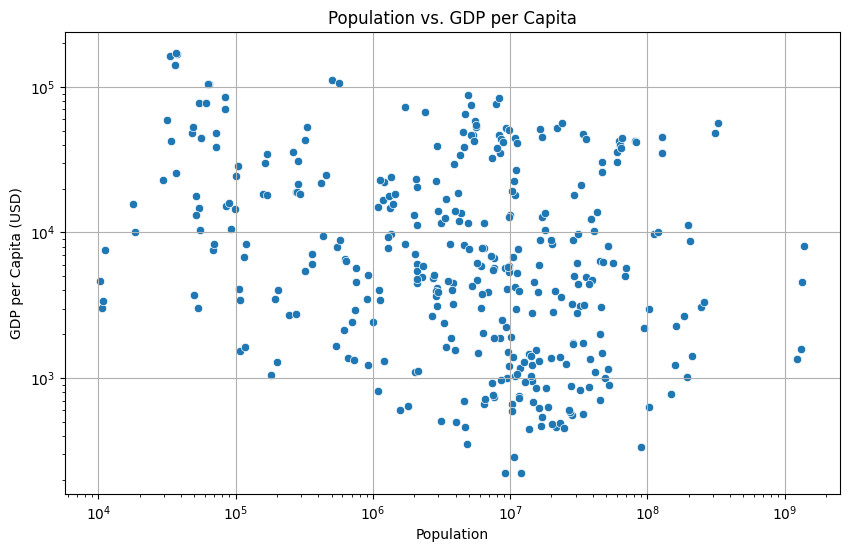

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df_final, x='population', y='GDP_per_capita')
plt.title('Population vs. GDP per Capita')
plt.xlabel('Population')
plt.ylabel('GDP per Capita (USD)')
plt.xscale('log')  # Log scale for better spread
plt.yscale('log')
plt.grid(True)
plt.show()

This plot shows a weak negative trend, especially for highly populated countries. However, exceptions exist (e.g., small populations with low GDP per capita, and large populations with high income like the US). Overall, a strong consistent relationship is not clearly visible, suggesting other variables influence GDP per capita.



##Box Plot – GDP per Capita Distribution by Population Groups

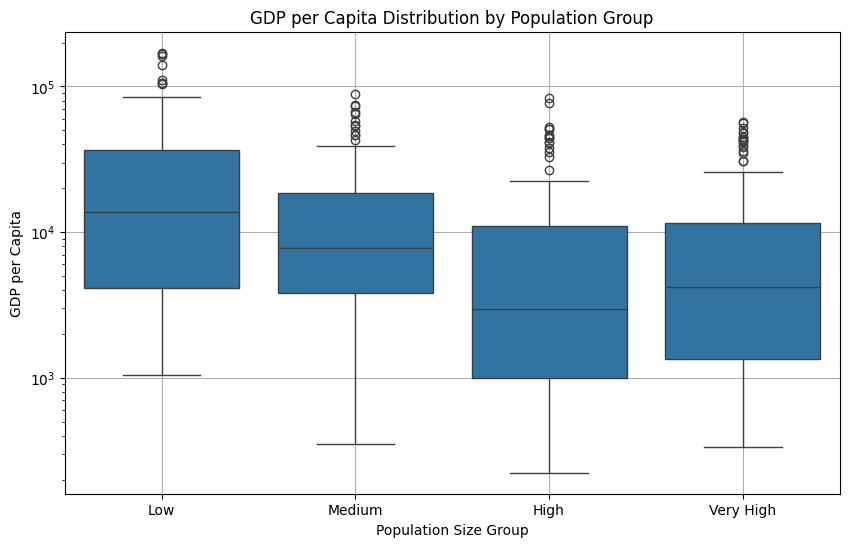

In [44]:
cleaned_df_final['population_bin'] = pd.qcut(cleaned_df_final['population'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df_final, x='population_bin', y='GDP_per_capita')
plt.title('GDP per Capita Distribution by Population Group')
plt.xlabel('Population Size Group')
plt.ylabel('GDP per Capita')
plt.yscale('log')
plt.grid(True)
plt.show()

This visualization shows that countries with lower populations tend to have more variation in GDP per capita, including some very high-income countries. However, no clear upward or downward trend is observed across population bins. Hence, population size alone is not a reliable predictor of GDP per capita.

### **5.2:** Reflection
**If I had more time**, I would incorporate additional socioeconomic variables like education levels, employment rates, natural resources, and trade openness to build a multivariate model explaining GDP per capita. I would also handle unmatched country names in the `pycountry` mapping more robustly and explore panel data analysis over a longer time span (e.g., 2000–2022) to analyze trends over time.